# SSD: Single Shot MultiBox Detector

This is designed to visualize score maps of trained model. Modified from 00-classification.ipynb.

### 1. Setup

* First, set up Python, `numpy`, and `matplotlib`.

In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (14, 14)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

* Load caffe

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

### 2. Load net and set up input preprocessing

* Set Caffe to GPU mode and load the net from disk.

In [3]:
caffe.set_device(0)
caffe.set_mode_cpu()

model_def = '/home/kwang/det-crf/GBD/SSD_300x300_group_GBD_concat/test.prototxt'
model_weights = '/home/kwang/det-crf/GBD/SSD_300x300_group_GBD_concat/pretrain/VGG_VOC0712_SSD_300x300_iter_120000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [4]:
### perform detection
output = net.forward()

In [8]:
def analysis_blob(item_id, blob_name):
    cur_blob = net.blobs[blob_name].data[item_id]
    print '----{}----'.format(blob_name)
    print 'shape={}'.format(cur_blob.shape)
    abs_ave = np.sum(np.absolute(cur_blob)) / cur_blob.size
    print 'abs_ave={:.2f}'.format(abs_ave)
    return abs_ave

In [9]:
y = []
for blob_name, blob in net.blobs.iteritems():
    y.append(analysis_blob(0, blob_name))
    print ''

----data----
shape=(3, 300, 300)
abs_ave=71.52

----label----
shape=(1, 49, 8)
abs_ave=2.77

----data_data_0_split_0----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_1----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_2----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_3----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_4----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_5----
shape=(3, 300, 300)
abs_ave=71.52

----data_data_0_split_6----
shape=(3, 300, 300)
abs_ave=71.52

----conv1_1----
shape=(64, 300, 300)
abs_ave=25.31

----conv1_2----
shape=(64, 300, 300)
abs_ave=74.55

----pool1----
shape=(64, 150, 150)
abs_ave=95.46

----conv2_1----
shape=(128, 150, 150)
abs_ave=93.57

----conv2_2----
shape=(128, 150, 150)
abs_ave=68.17

----pool2----
shape=(128, 75, 75)
abs_ave=123.85

----conv3_1----
shape=(256, 75, 75)
abs_ave=95.25

----conv3_2----
shape=(256, 75, 75)
abs_ave=84.35

----conv3_3----
shape=(256, 75, 75)
abs_ave=32.94

---

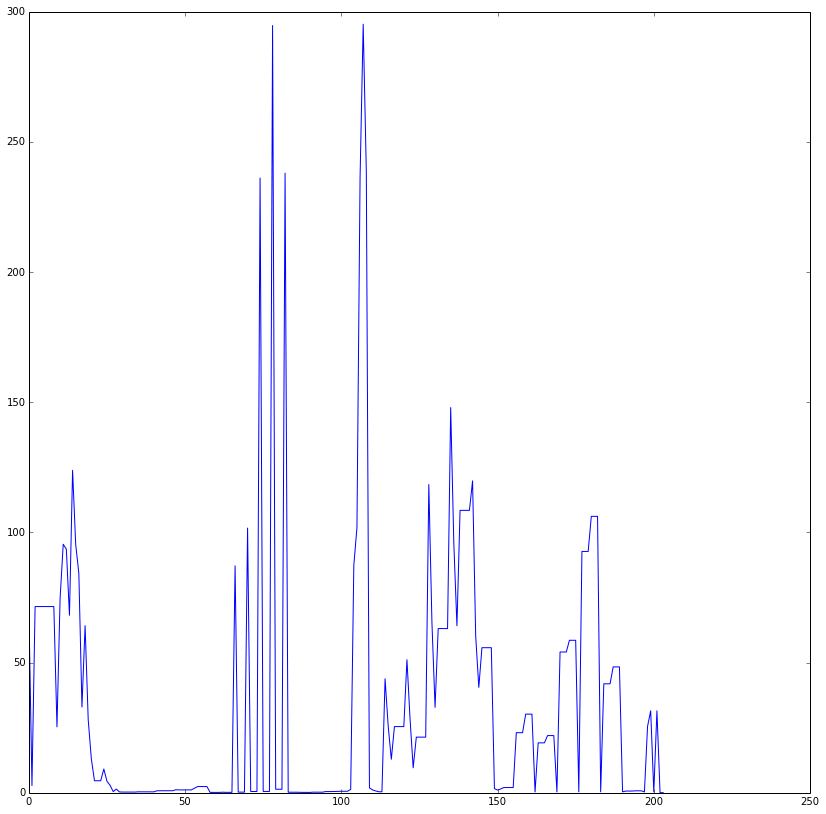

In [12]:
plt.plot(xrange(len(y)), y)